> __Purpose:__ This NB visualizes the results of the full study for ELEC573Net. Will be adding different feature engineerings here.

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42) 

from agglo_model_clust import *
from cluster_acc_viz_funcs import *
from DNN_FT_funcs import *
from DNN_AMC_funcs import *
from full_study_funcs import * 
from revamped_model_classes import *
from hyperparam_tuned_configs import *

import os
cwd = os.getcwd()
print("Current Working Directory: ", cwd)


Current Working Directory:  c:\Users\kdmen\Repos\fl-gestures\ELEC573_Proj


In [2]:
MODEL_STR = "ELEC573Net"
MY_CONFIG = ELEC573Net_config
SAVE_FIGS = False
timestamp = datetime.now().strftime("%Y%m%d_%H%M")

# Train/test user split: 24/8



In [3]:
expdef_df = load_expdef_gestures(feateng_method=MY_CONFIG["feature_engr"])

print(expdef_df.shape)
expdef_df.head()

(3200, 6)


,Participant,Gesture_ID,Gesture_Num,feature,Gesture_Encoded,Cluster_ID
0,P004,close,1,"[[6.079045311063784], [-7.551458873254243], [-...",0,0
1,P004,close,10,"[[5.994789910363704], [-7.978871468164499], [-...",0,0
2,P004,close,2,"[[6.010193380499154], [-7.7063875553339], [-20...",0,0
3,P004,close,3,"[[5.8212078257286874], [-7.463908156909893], [...",0,0
4,P004,close,4,"[[5.974675085061773], [-7.945111601415482], [-...",0,0


In [4]:
import json
# Load the fixed user splits
with open("24_8_user_splits.json", "r") as f:
    splits = json.load(f)
all_participants = splits["all_users"]
test_participants = splits["test_users"]


In [5]:
# Prepare data
data_splits = prepare_data(
    expdef_df, 'feature', 'Gesture_Encoded', 
    all_participants, test_participants, 
    training_trials_per_gesture=8, finetuning_trials_per_gesture=3,
)

In [6]:
features_df = pd.DataFrame(data_splits['train']['feature'])
# Create a new column 'features' that contains all 80 columns as lists
features_df['feature'] = features_df.apply(lambda row: row.tolist(), axis=1)
# Keep only the new combined column
features_df = features_df[['feature']]
# Combine with labels and participant_ids into a single DataFrame
train_df = pd.concat([features_df, pd.Series(data_splits['train']['labels'], name='Gesture_Encoded'), pd.Series(data_splits['train']['participant_ids'], name='participant_ids')], axis=1)
label_encoder = LabelEncoder()
train_df['Cluster_ID'] = label_encoder.fit_transform(train_df['participant_ids'])

features_df = pd.DataFrame(data_splits['intra_subject_test']['feature'])
# Create a new column 'features' that contains all 80 columns as lists
features_df['feature'] = features_df.apply(lambda row: row.tolist(), axis=1)
# Keep only the new combined column
features_df = features_df[['feature']]
# Combine with labels and participant_ids into a single DataFrame
test_df = pd.concat([features_df, pd.Series(data_splits['intra_subject_test']['labels'], name='Gesture_Encoded'), pd.Series(data_splits['intra_subject_test']['participant_ids'], name='participant_ids')], axis=1)
label_encoder = LabelEncoder()
test_df['Cluster_ID'] = label_encoder.fit_transform(test_df['participant_ids'])

# ENTIRELY WITHHOLDING CROSS CLUSTER DATASET (NOVEL TEST SUBJECTS) FOR NOW. 
# TODO: Pull this from other file
#test_df
#features_df = pd.DataFrame(data_splits['train']['features'])
## Create a new column 'features' that contains all 80 columns as lists
#features_df['features'] = features_df.apply(lambda row: row.tolist(), axis=1)
## Keep only the new combined column
#features_df = features_df[['features']]
## Combine with labels and participant_ids into a single DataFrame
#train_df = pd.concat([features_df, pd.Series(data_splits['train']['labels'], name='Gesture_Encoded'), pd.Series(data_splits['train']['participant_ids'], name='participant_ids')], axis=1)

In [7]:
data_dfs_dict = {'train':train_df, 'test':test_df}

# Need to update Cluster_ID col at the end of each round, for both dfs

In [8]:
train_df.head()

,feature,Gesture_Encoded,participant_ids,Cluster_ID
0,"[5.666009736227325, -7.511511161435965, -19.36...",0,P132,23
1,"[5.570696513420324, -7.241496903815359, -19.23...",0,P132,23
2,"[5.428858775780409, -7.181589528103809, -18.91...",0,P132,23
3,"[6.386627912676518, -8.914330682672142, -23.20...",0,P132,23
4,"[5.689161339648842, -7.217258577710168, -19.19...",0,P132,23


In [9]:
# FIRST TIME ONLY: MUST ACTUALLY RUN CLUSTERING!

# Load the CLUSTERING RESULTS DATA
with open('C:\\Users\\kdmen\\Repos\\fl-gestures\\ELEC573_Proj\\results\\clustering_models\\20250210_2032\\spectralFE80_ELEC573Net_agglo_merge_res.pkl', 'rb') as f:
    merge_log = pickle.load(f)
    intra_cluster_performance = pickle.load(f)
    cross_cluster_performance = pickle.load(f)
    nested_clus_model_dict = pickle.load(f)

print("Data has been loaded successfully!")

Data has been loaded successfully!


In [10]:
cluster_lst = list(nested_clus_model_dict['Iter18'].keys())
print("Cluster list:")
print(cluster_lst)

Cluster list:
[8, 34, 36, 37, 38, 41]


In [11]:
# This needs to be formalized......

cluster_lst = list(nested_clus_model_dict['Iter18'].keys())
print("Cluster list:")
print(cluster_lst)

Cluster list:
[8, 34, 36, 37, 38, 41]


# Finetuning Process

In [12]:
full_path = "C:\\Users\\kdmen\\Repos\\fl-gestures\\ELEC573_Proj\\models\\20250211_2019"
print("Full Path:", full_path)
# Load the pretrained model
pretrained_generic_model = ELEC573Net(MY_CONFIG)
pretrained_generic_model.load_state_dict(torch.load(full_path+"\\pretrained_ELEC573Net_model.pth"))

Full Path: C:\Users\kdmen\Repos\fl-gestures\ELEC573_Proj\models\20250211_2019


<All keys matched successfully>

In [13]:
cluster_lst = list(nested_clus_model_dict['Iter18'].keys())
print("Cluster list:")
print(cluster_lst)
print()
print("Cluster 41 model:")
print(nested_clus_model_dict['Iter18'][41])

Cluster list:
[8, 34, 36, 37, 38, 41]

Cluster 41 model:
ELEC573Net(
  (relu): ReLU()
  (maxpool): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (softmax): Softmax(dim=1)
  (conv1): Conv1d(1, 32, kernel_size=(5,), stride=(2,), padding=(1,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(32, 64, kernel_size=(5,), stride=(2,), padding=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(64, 128, kernel_size=(5,), stride=(2,), padding=(1,))
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [14]:
# Prepare data
one_trial_data_splits = prepare_data(
    expdef_df, 'feature', 'Gesture_Encoded', 
    all_participants, test_participants, 
    training_trials_per_gesture=1, finetuning_trials_per_gesture=1,
)

three_trial_data_splits = prepare_data(
    expdef_df, 'feature', 'Gesture_Encoded', 
    all_participants, test_participants, 
    training_trials_per_gesture=3, finetuning_trials_per_gesture=3,
)

five_trial_data_splits = prepare_data(
    expdef_df, 'feature', 'Gesture_Encoded', 
    all_participants, test_participants, 
    training_trials_per_gesture=5, finetuning_trials_per_gesture=5,
)

## One-shot training (local+FT)

In [15]:
data_dict_1_1 = full_comparison_run(one_trial_data_splits, one_trial_data_splits, MY_CONFIG, pretrained_generic_model,
                        nested_clus_model_dict, MODEL_STR, cluster_iter_str='Iter18')

PID P010, 0/8
Epoch 00008: reducing learning rate of group 0 to 1.0000e-06.
Cluster 34 had the highest accuracy (0.3)
Epoch 00013: reducing learning rate of group 0 to 1.0000e-06.
PID P102, 1/8
Cluster 41 had the highest accuracy (0.4)
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
PID P104, 2/8
Cluster 38 had the highest accuracy (0.7)
PID P108, 3/8
Cluster 8 had the highest accuracy (0.6)
PID P121, 4/8
Cluster 41 had the highest accuracy (0.8)
PID P123, 5/8
Epoch 00011: reducing learning rate of group 0 to 1.0000e-06.
Cluster 8 had the highest accuracy (0.1)
PID P124, 6/8
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
Cluster 38 had the highest accuracy (0.8)
PID P128, 7/8
Cluster 37 had the highest accuracy (1.0)
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.


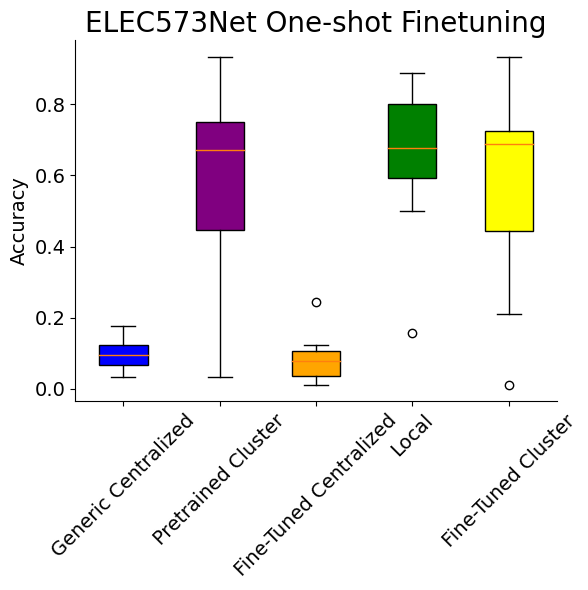

In [16]:
plot_model_acc_boxplots(data_dict_1_1, my_title=f"{MODEL_STR} One-shot Finetuning", save_fig=False, plot_save_name=f"Final_{MODEL_STR}_Acc_1TA_1TT")

## Few-shot (5 shot) trials for training (local+FT)

In [17]:
data_dict_5_5 = full_comparison_run(five_trial_data_splits, five_trial_data_splits, MY_CONFIG, pretrained_generic_model,
                        nested_clus_model_dict, MODEL_STR, cluster_iter_str='Iter18')

PID P010, 0/8
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
Cluster 34 had the highest accuracy (0.22)
Epoch 00007: reducing learning rate of group 0 to 1.0000e-06.
PID P102, 1/8
Cluster 41 had the highest accuracy (0.66)
Epoch 00007: reducing learning rate of group 0 to 1.0000e-06.
PID P104, 2/8
Epoch 00013: reducing learning rate of group 0 to 1.0000e-06.
Cluster 38 had the highest accuracy (0.68)
Epoch 00014: reducing learning rate of group 0 to 1.0000e-06.
PID P108, 3/8
Cluster 8 had the highest accuracy (0.52)
Epoch 00017: reducing learning rate of group 0 to 1.0000e-06.
PID P121, 4/8
Cluster 41 had the highest accuracy (0.7)
Epoch 00019: reducing learning rate of group 0 to 1.0000e-06.
PID P123, 5/8
Epoch 00013: reducing learning rate of group 0 to 1.0000e-06.
Cluster 37 had the highest accuracy (0.12)
Epoch 00014: reducing learning rate of group 0 to 1.0000e-06.
Epoch 00019: reducing learning rate of group 0 to 1.0000e-07.
PID P124, 6/8
Cluster 38 had the highest

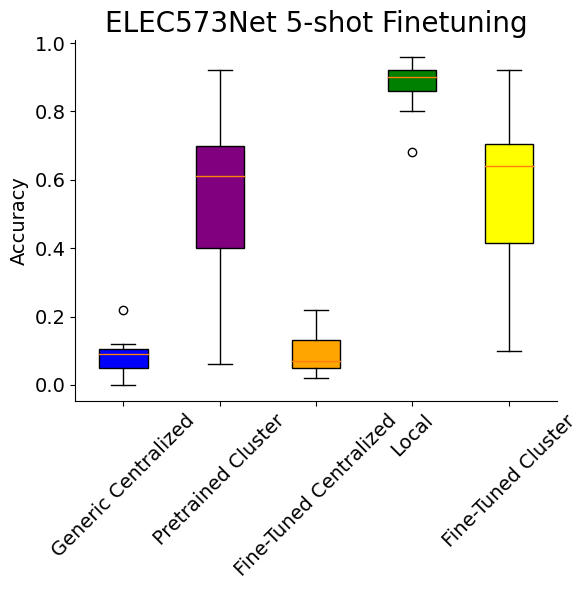

In [18]:
plot_model_acc_boxplots(data_dict_5_5, my_title=f"{MODEL_STR} 5-shot Finetuning", save_fig=False, plot_save_name=f"Final_{MODEL_STR}_Acc_5TA_5TT")


In [25]:
data_dict_5_5.keys()

dict_keys(['local_acc_data', 'centralized_acc_data', 'ft_centralized_acc_data', 'pretrained_cluster_acc_data', 'ft_cluster_acc_data'])

In [26]:
data_dict_5_5['local_acc_data']

[0.92, 0.8, 0.88, 0.68, 0.9, 0.9, 0.96, 0.92]

In [27]:
data_dict_5_5['centralized_acc_data']

[0.0, 0.1, 0.1, 0.02, 0.06, 0.12, 0.08, 0.22]

In [28]:
data_dict_5_5['ft_centralized_acc_data']

[0.02, 0.06, 0.08, 0.02, 0.06, 0.22, 0.1, 0.22]

## Testing the Generic Model
> On its own training data (it was trained on train, tested on intra_test (same subjects as train), and also tested but not evaluated wrt cross_test)

In [19]:
model_type = "ELEC573Net"
sequence_length = 1  # Not sure what this should be here actually lol
time_steps = None
bs = MY_CONFIG["batch_size"]

In [20]:
unique_gestures = np.unique(data_splits['train']['labels'])
#num_classes = len(unique_gestures)
#input_dim = data_splits['train']['feature'].shape[1]

train_pids = data_splits['train']['participant_ids']  # THIS IS IN ORDER! NOT SHUFFLED!!
intra_pids = data_splits['intra_subject_test']['participant_ids']
cross_pids = data_splits['cross_subject_test']['participant_ids']

my_gesture_dataset = select_dataset_class(model_type)

train_dataset = my_gesture_dataset(
    data_splits['train']['feature'], 
    data_splits['train']['labels'], 
    sl=sequence_length, 
    ts=time_steps)
train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True) #, drop_last=True)

# INTRA SUBJECT (480)
intra_test_dataset = my_gesture_dataset(
    data_splits['intra_subject_test']['feature'], 
    data_splits['intra_subject_test']['labels'], 
    sl=sequence_length, 
    ts=time_steps)
# Shuffle doesn't matter for testing
intra_test_loader = DataLoader(intra_test_dataset, batch_size=bs, shuffle=False) #, drop_last=True)

# CROSS SUBJECT (560)
## Wait shouldn't I have 2 cross datasets? Are these the withheld users??
## I should have finetuning and withheld right? Presumably cross_test is withheld?
cross_test_dataset = my_gesture_dataset(
    data_splits['cross_subject_test']['feature'], 
    data_splits['cross_subject_test']['labels'], 
    sl=sequence_length, 
    ts=time_steps)
# Shuffle doesn't matter for testing
cross_test_loader = DataLoader(cross_test_dataset, batch_size=bs, shuffle=False) #, drop_last=True)

In [21]:
#'loss': total_loss / len(dataloader),
#'accuracy': np.mean(np.array(all_preds) == np.array(all_labels)),
#'predictions': all_preds,
#'true_labels': all_labels

train_eval = evaluate_model(pretrained_generic_model, train_loader)
print(train_eval['accuracy'])

0.9171875


In [22]:
intra_eval = evaluate_model(pretrained_generic_model, intra_test_loader)
print(intra_eval['accuracy'])

0.9083333333333333


In [23]:
cross_eval = evaluate_model(pretrained_generic_model, cross_test_loader)
print(cross_eval['accuracy'])

0.08928571428571429


> Now looking at the novel finetuning participants specifically (one trial of data)

In [35]:
finetuning_datasplits = one_trial_data_splits
config = MY_CONFIG

In [36]:
train_pids = np.unique(finetuning_datasplits['train']['participant_ids'])

novel_participant_ft_data = finetuning_datasplits['novel_trainFT']
# novel "cross subject" is the same as novel intra (but needs to be separated according to PID first...)
novel_participant_test_data = finetuning_datasplits['cross_subject_test']
novel_pids = np.unique(finetuning_datasplits['novel_trainFT']['participant_ids'])

novel_pid_res_dict = {}
for pid_count, pid in enumerate(novel_pids):
    print(f"PID {pid}, {pid_count+1}/{len(novel_pids)}")
    novel_pid_res_dict[pid] = {}

    # Create the testloader by segmenting out this specific pid
    # Filter based on CURRENT participant ID: 
    indices = [i for i, datasplit_pid in enumerate(novel_participant_ft_data['participant_ids']) if datasplit_pid == pid]
    ############## Novel Participant Finetuning Dataset ##############
    ft_dataset = GestureDataset([novel_participant_ft_data['feature'][i] for i in indices], [novel_participant_ft_data['labels'][i] for i in indices])
    ft_loader = DataLoader(ft_dataset, batch_size=config["batch_size"], shuffle=True)
    ############## Novel Participant Intra Testing Dataset ##############
    intra_test_dataset = GestureDataset([novel_participant_test_data['feature'][i] for i in indices], [novel_participant_test_data['labels'][i] for i in indices])
    intra_test_loader = DataLoader(intra_test_dataset, batch_size=config["batch_size"], shuffle=True)
    ############## Novel Participant Cross Testing Dataset ##############
    # This code is testing on all the other novel participants... I don't think we care about that right now
    ## Idc but this will allow us to check cross perf. No real reason to remove...
    indices = [i for i, datasplit_pid in enumerate(novel_participant_test_data['participant_ids']) if datasplit_pid != pid]
    cross_test_dataset = GestureDataset([novel_participant_test_data['feature'][i] for i in indices], [novel_participant_test_data['labels'][i] for i in indices])
    cross_test_loader = DataLoader(cross_test_dataset, batch_size=config["batch_size"], shuffle=True)

    # 2) Test the full pretrained (centralized) model
    generic_clus_res = evaluate_model(pretrained_generic_model, intra_test_loader)
    novel_pid_res_dict[pid]["centralized_acc"] = generic_clus_res["accuracy"]
    print(f"Pretrain generic acc: {generic_clus_res['accuracy']}")

    # 3) Test finetuned pretrained (centralized) model
    ft_centralized_model, _, _, _ = fine_tune_model(
        pretrained_generic_model, ft_loader, config, config['timestamp'], test_loader=intra_test_loader, pid=pid)
    ft_centralized_res = evaluate_model(ft_centralized_model, intra_test_loader)
    novel_pid_res_dict[pid]["ft_centralized_acc"] = ft_centralized_res["accuracy"]
    print(f"Pretrain FT acc: {ft_centralized_res['accuracy']}")

    print()

PID P010, 1/8
Pretrain generic acc: 0.0
Pretrain FT acc: 0.1

PID P102, 2/8
Pretrain generic acc: 0.0
Epoch 00007: reducing learning rate of group 0 to 1.0000e-06.
Pretrain FT acc: 0.0

PID P104, 3/8
Pretrain generic acc: 0.0
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
Pretrain FT acc: 0.0

PID P108, 4/8
Pretrain generic acc: 0.0
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
Pretrain FT acc: 0.0

PID P121, 5/8
Pretrain generic acc: 0.0
Pretrain FT acc: 0.0

PID P123, 6/8
Pretrain generic acc: 0.5
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
Pretrain FT acc: 0.2

PID P124, 7/8
Pretrain generic acc: 0.7
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
Pretrain FT acc: 0.7

PID P128, 8/8
Pretrain generic acc: 0.2
Pretrain FT acc: 0.1



We observe an extremely skewed performance, it does decent on P123 and P124, and worse than random chance on everyone else.  Also FTing doesn't seem to improve performance, in some cases makes it worse...

> Now looking at the novel finetuning participants specifically (five trials of data)

In [33]:
finetuning_datasplits = five_trial_data_splits
config = MY_CONFIG

In [ ]:
train_pids = np.unique(finetuning_datasplits['train']['participant_ids'])

novel_participant_ft_data = finetuning_datasplits['novel_trainFT']
# novel "cross subject" is the same as novel intra (but needs to be separated according to PID first...)
novel_participant_test_data = finetuning_datasplits['cross_subject_test']
novel_pids = np.unique(finetuning_datasplits['novel_trainFT']['participant_ids'])

novel_pid_res_dict = {}
for pid_count, pid in enumerate(novel_pids):
    print(f"PID {pid}, {pid_count+1}/{len(novel_pids)}")
    novel_pid_res_dict[pid] = {}

    # Create the testloader by segmenting out this specific pid
    # Filter based on CURRENT participant ID: 
    indices = [i for i, datasplit_pid in enumerate(novel_participant_ft_data['participant_ids']) if datasplit_pid == pid]
    ############## Novel Participant Finetuning Dataset ##############
    ft_dataset = GestureDataset([novel_participant_ft_data['feature'][i] for i in indices], [novel_participant_ft_data['labels'][i] for i in indices])
    ft_loader = DataLoader(ft_dataset, batch_size=config["batch_size"], shuffle=True)
    ############## Novel Participant Intra Testing Dataset ##############
    intra_test_dataset = GestureDataset([novel_participant_test_data['feature'][i] for i in indices], [novel_participant_test_data['labels'][i] for i in indices])
    intra_test_loader = DataLoader(intra_test_dataset, batch_size=config["batch_size"], shuffle=True)
    ############## Novel Participant Cross Testing Dataset ##############
    # This code is testing on all the other novel participants... I don't think we care about that right now
    ## Idc but this will allow us to check cross perf. No real reason to remove...
    indices = [i for i, datasplit_pid in enumerate(novel_participant_test_data['participant_ids']) if datasplit_pid != pid]
    cross_test_dataset = GestureDataset([novel_participant_test_data['feature'][i] for i in indices], [novel_participant_test_data['labels'][i] for i in indices])
    cross_test_loader = DataLoader(cross_test_dataset, batch_size=config["batch_size"], shuffle=True)

    # 2) Test the full pretrained (centralized) model
    generic_clus_res = evaluate_model(pretrained_generic_model, intra_test_loader)
    novel_pid_res_dict[pid]["centralized_acc"] = generic_clus_res["accuracy"]
    print(f"Pretrain generic acc: {generic_clus_res['accuracy']}")

    # 3) Test finetuned pretrained (centralized) model
    ft_centralized_model, _, _, _ = fine_tune_model(
        pretrained_generic_model, ft_loader, config, config['timestamp'], test_loader=intra_test_loader, pid=pid)
    ft_centralized_res = evaluate_model(ft_centralized_model, intra_test_loader)
    novel_pid_res_dict[pid]["ft_centralized_acc"] = ft_centralized_res["accuracy"]
    print(f"Pretrain FT acc: {ft_centralized_res['accuracy']}")

    print()

PID P010, 1/8
Pretrain generic acc: 0.0
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
Pretrain FT acc: 0.08

PID P102, 2/8
Pretrain generic acc: 0.1
Pretrain FT acc: 0.14

PID P104, 3/8
Pretrain generic acc: 0.1
Epoch 00015: reducing learning rate of group 0 to 1.0000e-06.
Pretrain FT acc: 0.08

PID P108, 4/8
Pretrain generic acc: 0.04
Epoch 00008: reducing learning rate of group 0 to 1.0000e-06.
Pretrain FT acc: 0.02

PID P121, 5/8
Pretrain generic acc: 0.1
Pretrain FT acc: 0.08

PID P123, 6/8
Pretrain generic acc: 0.14
Pretrain FT acc: 0.22

PID P124, 7/8
Pretrain generic acc: 0.12
Pretrain FT acc: 0.1

PID P128, 8/8
Pretrain generic acc: 0.24
Epoch 00007: reducing learning rate of group 0 to 1.0000e-06.
Pretrain FT acc: 0.3

